In [3]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Local Differential Privacy(LDP) with Bounded Laplace Mechanism(BLM)

## LDP
 The notion of LDP can be written as follows,
  $$\frac{Pr[A(v) == y ]}{Pr[A(\hat{v}) == y]}   <= \epsilon $$
An Algorithm $A$ satisfies an $\epsilon-Local~Differential~Privacy$ where $\epsilon > 0$ $if~and~only~if$ for any input $v$ and $\hat{v}$

## BLM
  BLM is the randomized mechanism that we will use for our privacy preserving mechanism. We will simulate LDP and see if this Mechanism satisfies $\epsilon$-LDP. Also, I will try to experiment the boundary or some constraints for this mechanism to work.

  The Bounded Laplace Mechanism is as follows,
  $$f_{W_q}(x) = \frac{1}{C_q}\frac{1}{2b}e^{-\frac{|x-q|}{b}}, ~~x \in D$$


In this notebook we will do the followings
 1. Build a metric that measures whether a mechanism satisfies Differential Privacy
 2. Define a BLM function and show it satisfies $\epsilon$-LDP



In [6]:
sensitivity=1
epsilon = 0.1

np.random.laplace(scale=sensitivity/epsilon)

-29.041246411382062

In [7]:
# laplace mechanism

def laplace_mechanism(value: float, sensitivity: float, epsilon: float):
    '''
    This function is the basic laplace mechanism
    '''
    if epsilon <= 0 :
        raise ValueError("epsilon should be bigger than 0")
    
    randomized_noise = np.random.laplace(scale=sensitivity/epsilon)
    value_hat = value + randomized_noise
    return value_hat

# check the results of laplace mechanism
laplace_mechanism(10, 0.1, 0.1)    

10.223644903609589

<AxesSubplot:>

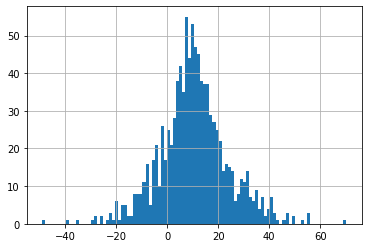

In [14]:
samples = pd.Series([laplace_mechanism(10, 1, 0.1) for _ in range(1000)])

samples.hist(bins=100)

# we can see that the values are created from laplace distribution
# some values are even negative, or too big than the original value
# we will implement bounded laplace mechism to solve these issues..

## Applying BLM

Lets say we wanted to take the value 4 and wanted to satisfy local differential privacy using BLM. We want the value to be in the range of 1 to 10. 
In this situation, how can we make apply BLM? Is it possible to apply this mechanism? Will it not violate privacy loss? 

There are some regulations that must be met in order to satisfy BLM.

In [ ]:
# BLM

def bounded_laplace_mechanism(value: float, 
                              b: float, 
                              C_q: float, 
                              boundary: tuple, 
                              epsilon: float,
                              delta: float):
    '''
    This function outputs a randomized value which satisfies epsilon,delta-DP
    '''
    # Calculate b


    # the C_q value for boundary (l,u)
    C_q = 1 - (1/2)*(np.exp(-((q-l)/b)) + np.exp(-(u-q)/b))

    # derivitive of C(b)
    dC = (C_l + dQ) / C_l
    
    # check variance before applying BLM 
    if b < dQ/(epsilon - np.log(dC) - np.log(1 - delta)):
        raise Exception("the variance condition is not met. Please check the variance")

    if b <= 0 :
        raise "b should be a positive number"
    
    e_term = np.exp(-(abs(value - q)/b))
    W_q = (1/C_q)*(1/2*b)*(e_term)

    return W_q

